# Import the Libraries and Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.linear_model import LinearRegression, Ridge,Lasso, ElasticNet
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")



# Load the Dataset

In [2]:
train_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")


In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test_df.shape

(1460, 81)

# EDA

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
train_df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

# Handling Missing Value 

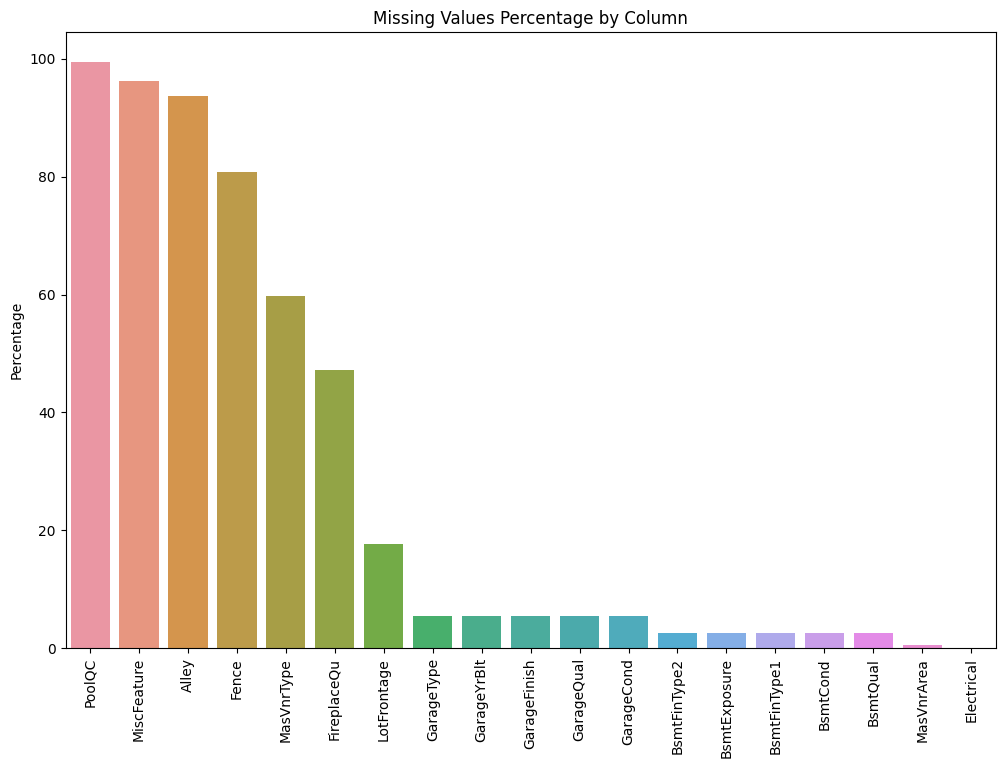

In [9]:
def missing_values(df):
    missing_data = df.isnull().sum()
    missing_percentage = (df.isnull().sum() / len(df)) * 100
    missing_info = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
    missing_info = missing_info[missing_info['Missing Values'] > 0].sort_values('Percentage', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x=missing_info.index, y=missing_info['Percentage'])
    plt.xticks(rotation=90)
    plt.title('Missing Values Percentage by Column')
    plt.show()

missing_values(train_df)


In [10]:
def fill_missing_values(df, cat_cols, num_cols) :
    for col in cat_cols :
        if 'Pool' in col or 'Garage' in col or 'Fireplace' in col or 'Bsmt' in col or 'Alley' in col or 'PoolQC' in col or 'Fence' in col or 'MiscFeature' in col :
            df[col].fillna('None', inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)
            
    for col in num_cols :
        df[col].fillna(df[col].median(), inplace=True)
        
        
        
categorical_feats = train_df.select_dtypes(include=['object']).columns
numerical_feats = train_df.select_dtypes(exclude=['object']).columns

missing_cat_cols = [col for col in categorical_feats if train_df[col].isnull().sum() > 0]
missing_num_cols = [col for col in numerical_feats if train_df[col].isnull().sum() > 0]

fill_missing_values(train_df, missing_cat_cols, missing_num_cols)
fill_missing_values(test_df, missing_cat_cols, missing_num_cols)
         

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
train_df['LotFrontage'] = train_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x : x.fillna(x.median()))
test_df['LotFrontage'] = train_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x : x.fillna(x.median()))


In [13]:
train_df['GarageYrBlt'] = train_df.apply(lambda row: 0 if row['GarageType'] == 'None' else row['GarageYrBlt'], axis=1)
test_df['GarageYrBlt'] = test_df.apply(lambda row: 0 if row['GarageType'] == 'None' else row['GarageYrBlt'], axis=1)


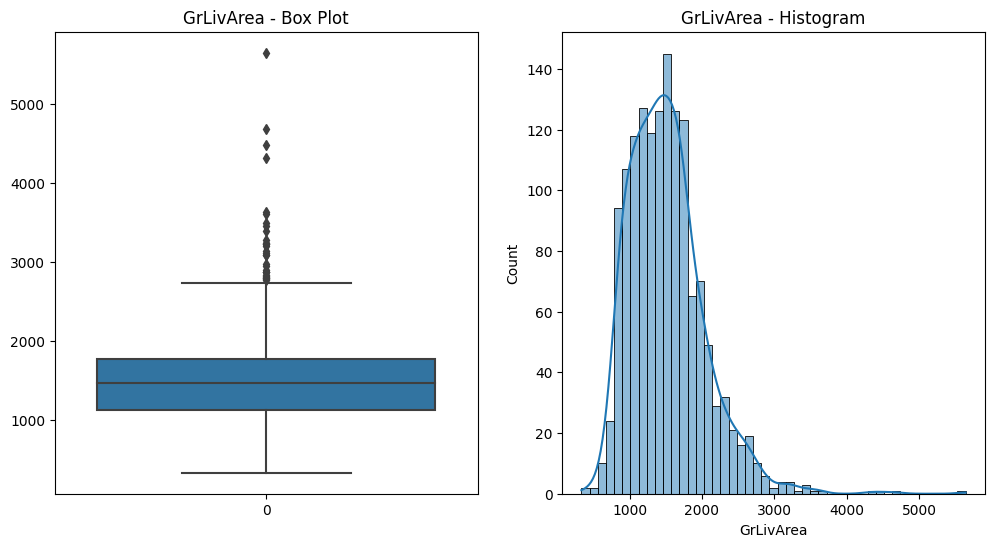

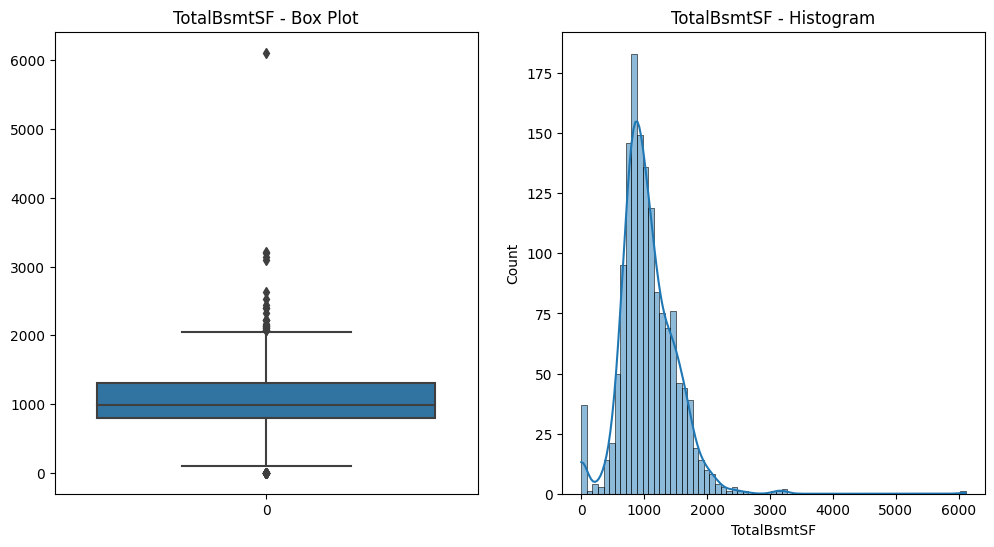

In [14]:
def plot_outliers(df, column):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(df[column])
    plt.title(f'{column} - Box Plot')

    plt.subplot(1, 2, 2)
    sns.histplot(df[column], kde=True)
    plt.title(f'{column} - Histogram')
    plt.show()

plot_outliers(train_df, 'GrLivArea')
plot_outliers(train_df, 'TotalBsmtSF')


In [15]:
def remove_outliers(df, column) :
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


train_df = remove_outliers(train_df, 'GrLivArea')
train_df = remove_outliers(train_df, 'TotalBsmtSF')

# Feature Engineering

In [16]:
train_df['HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']
train_df['RemodAge'] = train_df['YrSold'] - train_df['YearRemodAdd']
test_df['HouseAge'] = test_df['YrSold'] - test_df['YearBuilt']
test_df['RemodAge'] = test_df['YrSold'] - test_df['YearRemodAdd']


# Total Bathrooms
train_df['TotalBathrooms'] = (train_df['FullBath'] + 0.5 * train_df['HalfBath'] + 
                           train_df['BsmtFullBath'] + 0.5 * train_df['BsmtHalfBath'])
test_df['TotalBathrooms'] = (test_df['FullBath'] + 0.5 * test_df['HalfBath'] + 
                          test_df['BsmtFullBath'] + 0.5 * test_df['BsmtHalfBath'])

# Total Porch Areat
train_df['TotalPorchSF'] = (train_df['OpenPorchSF'] + train_df['3SsnPorch'] + 
                         train_df['EnclosedPorch'] + train_df['ScreenPorch'] + train_df['WoodDeckSF'])
test_df['TotalPorchSF'] = (test_df['OpenPorchSF'] + test_df['3SsnPorch'] + 
                        test_df['EnclosedPorch'] + test_df['ScreenPorch'] + test_df['WoodDeckSF'])

# Total Rooms
train_df['TotalRooms'] = train_df['TotRmsAbvGrd'] + train_df['TotalBsmtSF']
test_df['TotalRooms'] = test_df['TotRmsAbvGrd'] + test_df['TotalBsmtSF']

# Encoding

In [17]:
y = train_df['SalePrice']
train_ids = train_df['Id']
test_ids = test_df['Id']

# Drop columns not used in model
train_df.drop(['SalePrice', 'Id'], axis=1, inplace=True)
test_df.drop('Id', axis=1, inplace=True)

# One-Hot Encoding
train_df = pd.get_dummies(train_df, drop_first=True)
test_df = pd.get_dummies(test_df, drop_first=True)


# Split the Data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=0.2, random_state=42)


# Model Training And Evaluation

In [19]:
models ={
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'RandomForest': RandomForestRegressor(),
    'XGBRegressor': XGBRegressor()
}

for name, model in models.items() :
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f'{name} - RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
    print(f'{name} - R2: {r2_score(y_test, y_pred)}')

LinearRegression - RMSE: 21093.252129444096
LinearRegression - R2: 0.8955435131438911
Ridge - RMSE: 19513.40092663676
Ridge - R2: 0.9106047870815528
Lasso - RMSE: 20853.057834408402
Lasso - R2: 0.8979089141512238
ElasticNet - RMSE: 22149.70146033937
ElasticNet - R2: 0.8848181415063396
RandomForest - RMSE: 22262.506831489354
RandomForest - R2: 0.8836419434040936
XGBRegressor - RMSE: 22020.618058214
XGBRegressor - R2: 0.8861567367318186


In [20]:
from sklearn.model_selection import cross_val_score

# Evaluate models using cross-validation
scores = {}
for model_name, model in models.items():
    cv_scores = cross_val_score(model, train_df, y, cv=5, scoring='neg_mean_squared_error')
    scores[model_name] = -cv_scores.mean()  # Convert negative MSE to positive

# Display model performance
for model_name, score in scores.items():
    print(f"{model_name}: RMSE = {np.sqrt(score)}")


best_model_name = min(scores, key=scores.get)
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")


LinearRegression: RMSE = 21852.31108898959
Ridge: RMSE = 20609.60305031332
Lasso: RMSE = 21283.609001600948
ElasticNet: RMSE = 23515.568221804748
RandomForest: RMSE = 23295.238556357253
XGBRegressor: RMSE = 23025.503347378795
Best Model: Ridge


In [21]:
# Example with GridSearchCV for RandomForest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print(f'Best Parameters: {grid_search.best_params_}')


Best Parameters: {'max_depth': 20, 'n_estimators': 200}


In [22]:
# Train final model on entire training set
final_model = RandomForestRegressor(n_estimators=100, max_depth=20)
final_model.fit(train_df, y)


RandomForestRegressor(max_depth=20)

In [23]:
# Step 1: Ensure that test_df has the same columns as train_df
# Extract columns used for fitting the model
train_columns = train_df.columns

# Ensure test_df has all the columns that are in train_df
for col in train_columns:
    if col not in test_df.columns:
        test_df[col] = 0  # or np.nan, depending on what makes sense

# Reorder columns to match the training set
test_df = test_df[train_columns]

# Step 2: Fit your model (if not done already)
# Example: final_model.fit(train_df, y)

# Step 3: Predict on test set
test_predictions = final_model.predict(test_df)

# Step 4: Create the submission file
if 'Id' in test_df.columns:
    test_ids = test_df['Id'].values
else:
    test_ids = range(len(test_predictions))  # Generate dummy Ids if needed

submission = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': test_predictions
})

# Save to CSV
submission.to_csv('submission.csv', index=False)


In [24]:
df = pd.read_csv("submission.csv")
df

,Id,SalePrice
0,0,207754.336538
1,1,176058.320000
2,2,221005.592941
3,3,153977.610000
4,4,262180.640000
...,...,...
1455,1455,175712.873483
1456,1456,206081.000000
1457,1457,262778.150000
1458,1458,142110.495714
